<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# TRABAJO PRACTICO LABORATORIO
#### Autor: RICARDO RELOZ


# Trabajo semanal 13 - Síntesis de cuadripolos doblemente cargados

## Parte A:  Diseñe el cuadripolo A para que se comporte como:
    Filtro pasa bajos Bessel de 3er. orden 
    No disipativo
    Normalizado en frecuencia e impedancia
    Respetando la siguiente topología:
<img src="./ej1.png" align="left" width="500" /> 

### Obtenga la impedancia de entrada al cuadripolo A, cargado con un resistor de 1Ω a la salida.
### Sintetice A como un cuadripolo escalera.
### Simule el comportamiento de la red en LTspice graficando S21 y S11 en función de la frecuencia. (Ver explicación de Agustín Alba Chicar 1h 48m)
### Explique el comportamiento de A a partir de los valores de S11 en las siguientes frecuencias:
### -Centro de la banda de paso
### -Frecuencia de corte
### -Transición y centro de la banda de detenida
### Modifique el circuito para que la frecuencia de corte sea 2 π 10⁶ rad/s y la resistencia del generador sea 50Ω.


## Parte B: Trabajo de Investigación sobre NANO VNA ( Vector Network Analyzer )

### Explique brevemente la función principal de un VNA y en que situación/es puede ser fundamental tenerlo como herramienta de medición. 
### Comparar respecto a un DSO GW Insteak características de: Ancho de Banda, Rango Dinámico e Impedancia de Entrada.
### Además de las mediciones de S11 y S21 , investigar si el equipo cuenta con alguna medición en el dominio del tiempo.


## Ejercicio 1

### Solucion:
Se empezo obteniendo el H($) del BESSEL de orden 3, despues se lo multiplico por el conjugado para sacar S21 (foto 1)
Para sacar S11 teniendo el modulo cuadrado, se hizo el desarmado a mano (foto 2 & 3)
Para sacar Z11 se aplico la propiedades como muestra en el codigo y luego, debido a que el CAUER en la computadora tiraba errores por los calculos decimales, se hizo el CAUER a mano (foto 4)

Para rehacer el circuito pero con la wo y R solicitadas se hizo los cambios en S11 (foto 5 & 6)

<img src="./calculo1.jpeg" align="left" width="700" /> 
<img src="./calculo2.jpeg" align="left" width="700" /> 
<img src="./calculo3.jpeg" align="left" width="700" /> 
<img src="./calculo6.jpeg" align="left" width="700" /> 
<img src="./calculo4.jpeg" align="left" width="700" /> 
<img src="./calculo5.jpeg" align="left" width="700" /> 


<IPython.core.display.Math object>

<IPython.core.display.Math object>


///////////////////////////////////////////////////////////////////////////



<IPython.core.display.Math object>


///////////////////////////////////////////////////////////////////////////



<IPython.core.display.Math object>

<IPython.core.display.Math object>


///////////////////////////////////////////////////////////////////////////



<IPython.core.display.Math object>

<IPython.core.display.Math object>

S21 Analisis
S11 Analisis

VERIFICACION DE S11 obteniendo el Modulo cuadrado


<IPython.core.display.Math object>

<IPython.core.display.Math object>


///////////////////////////////////////////////////////////////////////////

Modificacion de circuito, con R = 50 ohm y wo = 2*pi*10**6

///////////////////////////////////////////////////////////////////////////



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

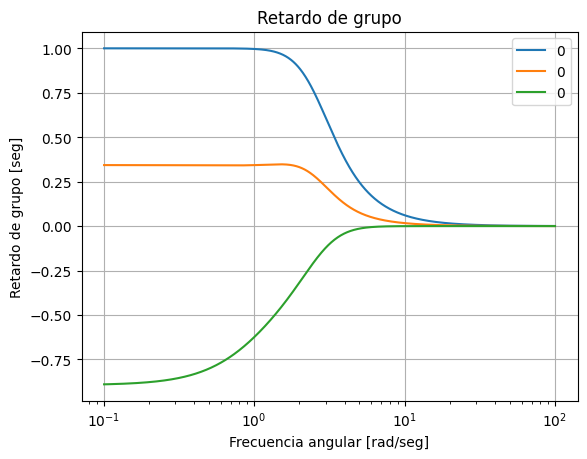

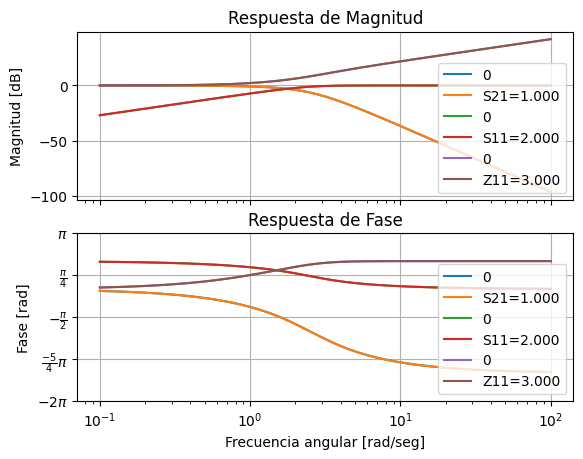

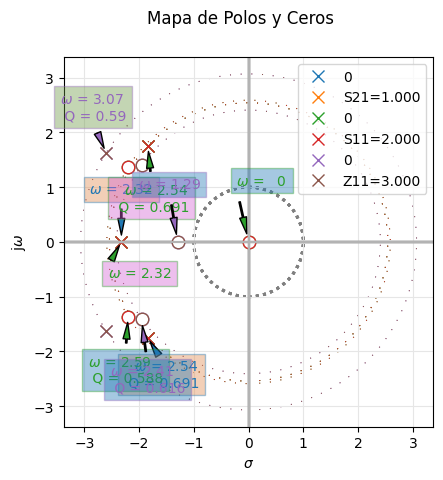

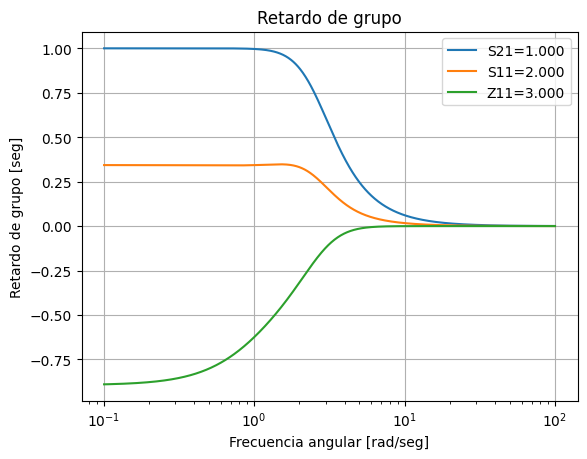

In [8]:
import sympy as sp
from sympy import symbols, Matrix
from sympy import init_printing
from sympy import simplify
from sympy import symbols, expand, factor, solve
from pytc2.general import to_latex

from schemdraw import Drawing

# Ahora importamos las funciones de PyTC2

from pytc2.remociones import remover_polo_dc, remover_polo_jw , remover_polo_jw2 ,remover_polo_infinito , remover_polo_dc2 , remover_polo_infinito2, isFRP , remover_polo_sigma
from pytc2.dibujar import display, dibujar_tanque_serie, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_elemento_derivacion,  dibujar_tanque_derivacion, dibujar_tanque_RC_serie,  dibujar_espacio_derivacion, Capacitor, Resistor, ResistorIEC
from pytc2.dibujar import dibujar_Pi, dibujar_Tee, dibujar_lattice
from pytc2.sintesis_dipolo import cauer_LC
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

from pytc2.dibujar import dibujar_cauer_LC
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s, simplify_n_monic
from IPython.display import display,  Markdown

from pytc2.cuadripolos import Z2Tabcd_s, Y2Tabcd_s, Tabcd2Z_s, Tabcd2Y_s
from pytc2.cuadripolos import calc_MAI_impedance_ij, calc_MAI_vtransf_ij_mn, calc_MAI_ztransf_ij_mn

import scipy.signal as sig
from pytc2.sistemas_lineales import analyze_sys
from sympy import conjugate, I,pi, N

patron = "\n" + "/" * 75 + "\n" # 75 barras para ajustar el largo deseado
# Activar la impresión en formato LaTeX
init_printing()
# Definir la variable simbólica s
s = sp.symbols('s',imaginary=True)
w = sp.symbols('w', real = True)
# Definir la función de transferencia T(s)
numerador = 15
denominador = s**3 + 6*s**2 + 15*s + 15
Tb = numerador / denominador
Tbc = sp.conjugate(Tb)

print_latex(a_equal_b_latex_s('Tb(s)', Tb))
print_latex(a_equal_b_latex_s('Tbc(s)', Tbc))

print(patron)

S21 = Tb
S21m2 = S21 * sp.conjugate(S21)
S21m2 = sp.simplify(sp.expand(sp.factor(S21m2)))
print_latex(a_equal_b_latex_s('S21m2(s)', S21m2))

print(patron)

S11m2 = 1 - S21m2
print_latex(a_equal_b_latex_s('S11m2(s)', S11m2))


S11m2 = sp.simplify(sp.expand(sp.factor(S11m2)))
print_latex(a_equal_b_latex_s('S11m2(s)', S11m2))

#//////////////////////////////////////////////////////////////////////////////
#s = sp.symbols('s',Complex=True)

print(patron)
A = sp.sqrt(6 + 2*sp.sqrt(45)) ; B = sp.sqrt(45) ; 
D = 6 ; E = 15 ; F = 15

NUMs11 =s**3 + A*s**2 + B*s 
DENs11 = s**3 + D*s**2 + E*s + F
S11 = NUMs11/DENs11
print_latex(a_equal_b_latex_s('S11(s)', S11))
print_latex(a_equal_b_latex_s('S11(s)', S11.evalf(2)))

print("S21 Analisis")
H = sig.TransferFunction( [15], [1, 6 , 15, +15] )
analyze_sys(H)
bodePlot(H, fig_id=1, filter_description = 'S21={:3.3f}'.format(1) )
pzmap(H, fig_id=2, filter_description = 'S21={:3.3f}'.format(1)) #S plane pole/zero plot
GroupDelay(H, fig_id=3, filter_description = 'S21={:3.3f}'.format(1))

print("S11 Analisis")
H = sig.TransferFunction( [1, 4.4, 6.7 , 0], [1, 6 , 15, +15] )
analyze_sys(H)
bodePlot(H, fig_id=1, filter_description = 'S11={:3.3f}'.format(2) )
pzmap(H, fig_id=2, filter_description = 'S11={:3.3f}'.format(2)) #S plane pole/zero plot
GroupDelay(H, fig_id=3, filter_description = 'S11={:3.3f}'.format(2))

print("\nVERIFICACION DE S11 obteniendo el Modulo cuadrado")
print_latex(a_equal_b_latex_s('S11m2(s)', sp.simplify(sp.expand(sp.factor(S11 * sp.conjugate(S11))))))

Z1 = (1+S11)/(1-S11)
Z1 = sp.simplify(sp.expand(sp.factor(Z1)))


H = sig.TransferFunction( [2, 10.4064053224, 21.7082039325 , 15], [1.59359467763, 8.2917960675, +15] )

analyze_sys(H)
bodePlot(H, fig_id=1, filter_description = 'Z11={:3.3f}'.format(3) )
pzmap(H, fig_id=2, filter_description = 'Z11={:3.3f}'.format(3)) #S plane pole/zero plot
GroupDelay(H, fig_id=3, filter_description = 'Z11={:3.3f}'.format(3))

print_latex(a_equal_b_latex_s('Z1(s)', Z1))
#//////////////////////////////////////////////////////////////////////////////
print(patron)
print("Modificacion de circuito, con R = 50 ohm y wo = 2*pi*10**6")

print(patron)
##/////////////////////////////////////////////////////////////////////////////

wo = 2*sp.pi*10**6
rg = 50

numerador = 15
denominador = (s/wo)**3 + 6*(s/wo)**2 + 15*(s/wo) + 15

S11 = sp.simplify(S11.subs(s, s/wo))
print_latex(a_equal_b_latex_s('S11(s)', S11))
print_latex(a_equal_b_latex_s('S11(s)', S11.evalf(2)))

Z1 = rg*(1+S11)/(1-S11)
Z1 = sp.simplify(sp.expand(sp.factor(Z1)))
#Z1 = sp.nsimplify(sp.expand(sp.factor(Z1))) #(para saber el desarme)
print_latex(a_equal_b_latex_s('Z1(s)', Z1))
print_latex(a_equal_b_latex_s('Z1(s)', Z1.evalf(2)))


## Ejercicio 1 LTSPICE

## Aclaracion: Los valores y graficas son aproimados debido a los redondeos por numeros irraciones
### IMAGEN 1 con valores normalizados
### IMAGEN 2 con valores adaptados a wo y R = 50 ohm

<img src="./circuito2.jpeg" align="left" width="700" /> 
<img src="./circuito1.jpeg" align="left" width="700" /> 

## Ejercicio 2
### 1. Función principal de un VNA
Un Vector Network Analyzer (VNA) es un equipo utilizado para medir parámetros de red en dispositivos electrónicos y circuitos de RF (radiofrecuencia). Su función es analizar las características de las redes, como la reflexión y la transmisión de señales, proporcionando datos sobre cómo se comporta un dispositivo bajo prueba (DUT) en términos de impedancia, ganancia, atenuación y fase. Los parámetros S (Scattering Parameters) son los más comunes, como S11 (coeficiente de reflexión) y S21 (coeficiente de transmisión), que indican la respuesta de una red a las señales de entrada y salida.
En situaciones donde se necesiten mediciones precisas de señales en el rango de alta frecuencia (RF o microondas), como en el diseño de antenas, filtros, amplificadores, y sistemas de comunicación, el VNA es una herramienta apta para la situacion. También hay que tomar en cuenta la calibración y optimización de sistemas de comunicación y en la fabricación de dispositivos que operan en frecuencias altas.
Aplicacion o casos de usos.
    - Diseño de filtros: Puede eterminar cómo se comportan los filtros en términos de atenuación y respuesta de frecuencia.
    - Pruebas de cables y conectores: Determinar la calidad y el desempeño de los cables, conectores y otras piezas intermedias.
    - Ajuste de antenas: Para verificar si las antenas están funcionando a la frecuencia deseada.
    - Caracterización de componentes activos: Como amplificadores y dispositivos semiconductores, para evaluar su ganancia, estabilidad y respuesta en frecuencia.
    - Verificación de la impedancia: Es útil para asegurar que los dispositivos estén adecuadamente emparejados con su carga para minimizar las pérdidas de señal.

### 2. Comparación: VNA vs DSO GW Insteak
3.1 Ancho de banda
    VNA: El ancho de banda depende de la frecuencia de operación del dispositivo, que generalmente cubre una amplia gama de frecuencias de RF y microondas. Pueden cubrir frecuencias de hasta 1 GHz.
    DSO GW Insteak: El ancho de banda de un osciloscopio de señales digitales (DSO) generalmente está limitado a la frecuencia máxima que puede muestrear y visualizar, lo que se traduce en un rango de análisis de señales de hasta unos pocos GHz dependiendo del modelo.

3.2 Rango Dinámico
    VNA: El rango dinámico de un VNA es mucho mayor, lo que le permite medir señales extremadamente pequeñas (como las de una antena o un filtro de RF) y compararlas con señales mucho más grandes. Esto es importante para caracterizar componentes que tienen una amplia gama de ganancias o atenuaciones.
    DSO GW Insteak: El rango dinámico es más limitado, ya que está diseñado para ver la forma de onda de una señal, pero no tiene la capacidad de medir señales de tan baja intensidad como un VNA.

3.3 Impedancia de Entrada
    VNA: Los VNAs tienen una impedancia de entrada fija de 50 ohmios, que es la impedancia estándar en RF para garantizar la correcta transferencia de energía sin reflexiones.
    DSO GW Insteak: Los osciloscopios típicos tienen una impedancia de entrada de 1 MΩ, adecuada para medir señales de baja frecuencia en aplicaciones generales de análisis de señales, pero no es adecuada para aplicaciones de RF sin la adaptación adecuada.

### 3. Mediciones en el dominio del tiempo en un Nano VNA

En un VNA, las mediciones principales están en el dominio de la frecuencia, ya que se enfoca en medir parámetros como S11 y S21, que proporcionan información sobre las características de reflexión y transmisión en función de la frecuencia. Algunos modelos avanzados de VNA, pueden ofrecer opciones de análisis en el dominio del tiempo utilizando transformadas de Fourier (FFT) de las mediciones en frecuencia.

Al realizar una transformada inversa de Fourier (IFFT) sobre los parámetros de dispersión en frecuencia, se puede obtener una representación de las señales en el dominio del tiempo. Esto es útil para análisis de pulsos o impulsos transitorios que podrían ser generados por ciertos componentes de RF, como filtros, amplificadores o líneas de transmisión.

VNA en el dominio del tiempo: Los modelos de VNA más modernos, incluidos algunos Nano VNAs, pueden calcular las respuestas en el dominio del tiempo a partir de las mediciones de frecuencia, lo que los convierte en una herramienta aún más versátil. Sin embargo, su rendimiento en este aspecto no suele ser tan avanzado como el de los osciloscopios especializados en análisis en el dominio del tiempo.

## Conclusiones y Reflexiones
La **síntesis de cuadripolos doblemente cargados** permite diseñar filtros con características específicas de transmisión y adaptación de impedancia. Herramientas como el Nano VNA facilitan la validación práctica de estos diseños al medir parámetros de dispersión (S11S11​ y S21S21​), asegurando una respuesta en frecuencia y minimizando pérdidas. Esta técnica es para la creación de dispositivos de comunicación y filtrado.